## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [5]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
#batchNormalize + Dropout
from keras.layers import Dropout,BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 20
BATCH_SIZE = [128,256]
MOMENTUM = 0.95
Dropout_EXP = [0.1,0.25,0.5]

In [23]:
results = {}
for drop_rate in Dropout_EXP:
    for batch_s in BATCH_SIZE: 
        keras.backend.clear_session()
        print("Experiment with Droprate = %.6f" % (drop_rate))
        print('Batch_suze = %.1f'%(batch_s) )
        model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop_rate)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=batch_s, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        exp_name_tag = "droprate-%s" %str(drop_rate)+"Batch-%s" %str(batch_s)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with Droprate = 0.100000
Batch_suze = 128.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)  

50000/50000 [==============================] - 16s 319us/step - loss: 1.2242 - acc: 0.5623 - val_loss: 1.4772 - val_acc: 0.4650
Epoch 13/20
50000/50000 [==============================] - 14s 284us/step - loss: 1.2048 - acc: 0.5703 - val_loss: 1.3743 - val_acc: 0.5038
Epoch 14/20
50000/50000 [==============================] - 14s 279us/step - loss: 1.2046 - acc: 0.5668 - val_loss: 1.4032 - val_acc: 0.5051
Epoch 15/20
50000/50000 [==============================] - 13s 268us/step - loss: 1.1759 - acc: 0.5806 - val_loss: 1.4434 - val_acc: 0.4878
Epoch 16/20
50000/50000 [==============================] - 13s 267us/step - loss: 1.1663 - acc: 0.5841 - val_loss: 1.5034 - val_acc: 0.4746
Epoch 17/20
50000/50000 [==============================] - 13s 265us/step - loss: 1.1487 - acc: 0.5919 - val_loss: 1.3916 - val_acc: 0.5062
Epoch 18/20
50000/50000 [==============================] - 20s 401us/step - loss: 1.1353 - acc: 0.5951 - val_loss: 1.3985 - val_acc: 0.5053
Epoch 19/20
50000/50000 [=======

50000/50000 [==============================] - 15s 290us/step - loss: 1.6169 - acc: 0.4241 - val_loss: 1.7257 - val_acc: 0.3881
Epoch 4/20
50000/50000 [==============================] - 14s 275us/step - loss: 1.5693 - acc: 0.4392 - val_loss: 1.7163 - val_acc: 0.3945
Epoch 5/20
50000/50000 [==============================] - 14s 277us/step - loss: 1.5405 - acc: 0.4489 - val_loss: 1.5732 - val_acc: 0.4381
Epoch 6/20
50000/50000 [==============================] - 15s 294us/step - loss: 1.5152 - acc: 0.4610 - val_loss: 1.5263 - val_acc: 0.4521
Epoch 7/20
50000/50000 [==============================] - 14s 286us/step - loss: 1.5039 - acc: 0.4632 - val_loss: 1.6804 - val_acc: 0.3947
Epoch 8/20
50000/50000 [==============================] - 15s 292us/step - loss: 1.4874 - acc: 0.4682 - val_loss: 1.4951 - val_acc: 0.4560
Epoch 9/20
50000/50000 [==============================] - 13s 256us/step - loss: 1.4669 - acc: 0.4768 - val_loss: 1.5962 - val_acc: 0.4300
Epoch 10/20
50000/50000 [=============

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 15s 296us/step - loss: 2.3964 - acc: 0.2320 - val_loss: 1.8428 - val_acc: 0.3317
Epoch 2/20
50000/50000 [==============================] - 14s 281us/step - loss: 1.9226 - acc: 0.3131 - val_loss: 1.8424 - val_acc: 0.3084
Epoch 3/20
50000/50000 [==============================] - 14s 281us/step - loss: 1.8055 - acc: 0.3523 - val_loss: 1.7424 - val_acc: 0.3594
Epoch 4/20
50000/50000 [==============================] - 13s 269us/step - loss: 1.7610 - acc: 0.3657 - val_loss: 1.8490 - val_acc: 0.3501
Epoch 5/20
50000/50000 [==============================] - 13s 268us/step - loss: 1.7433 - acc: 0.3746 - val_loss: 1.6539 - val_acc: 0.3979
Epoch 6/20
50000/50000 [==============================] - 13s 261us/step - loss: 1.7237 - acc: 0.3811 - val_loss: 1.7322 - val_acc: 0.3721
Epoch 7/20
50000/50000 [==============================] - 13s 259us/step - loss: 1.7155 - acc: 0.3853 - val_loss: 1.

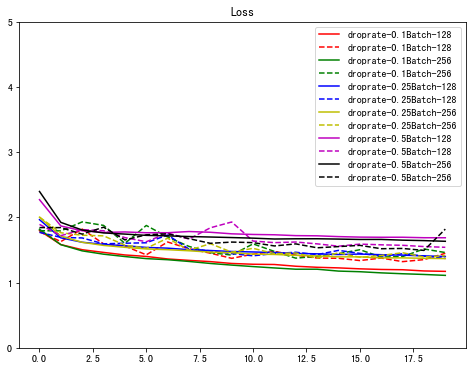

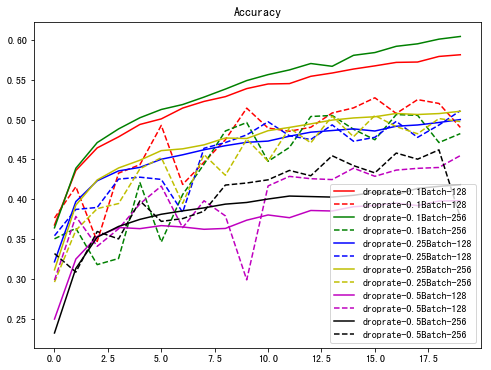

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()